# Classification Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
import seaborn as sns
from mpl_toolkits import mplot3d
import tensorflow as tf

## Basic Classification

(500, 2) (500,)


<AxesSubplot:xlabel='x1', ylabel='x2'>

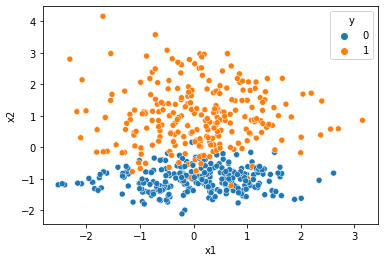

In [2]:
X, y = make_classification(n_samples=500, n_features=2, random_state=30, \
                           n_informative=1, n_classes=2, n_clusters_per_class=1, \
                           n_repeated=0, n_redundant=0)

print(X.shape, y.shape)

df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

sns.scatterplot(data=df,x='x1',y='x2',hue='y')

### Logistic Regression with Neural network (sigmoid)

<AxesSubplot:xlabel='x1', ylabel='x2'>

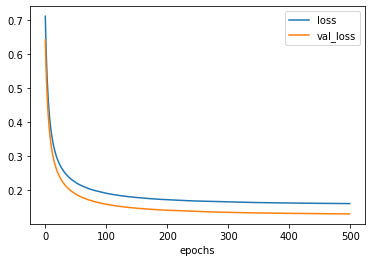

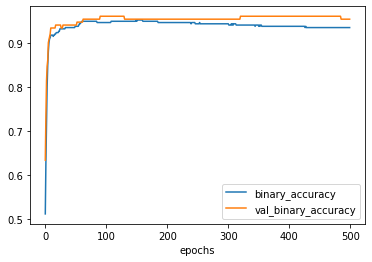

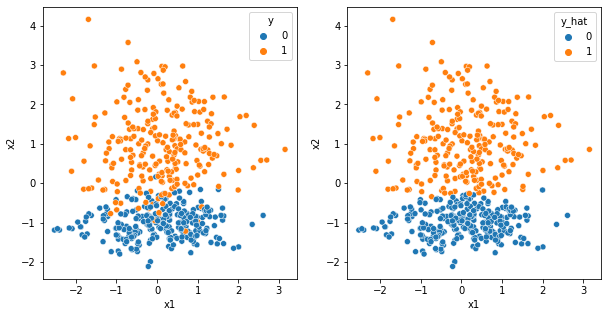

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])



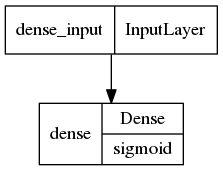

In [4]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

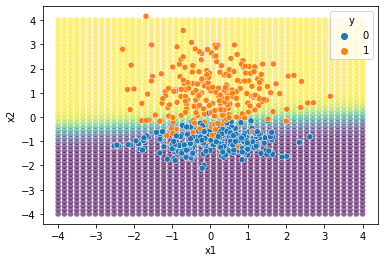

In [5]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### 2 sigmoid layers

<AxesSubplot:xlabel='x1', ylabel='x2'>

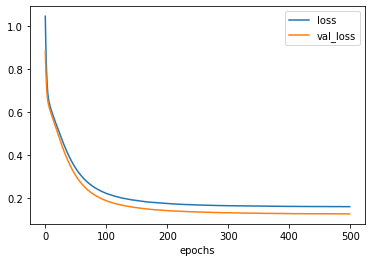

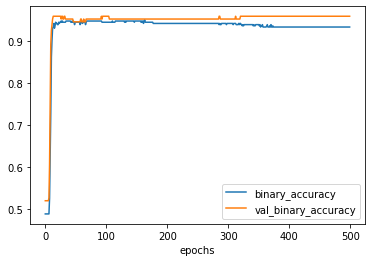

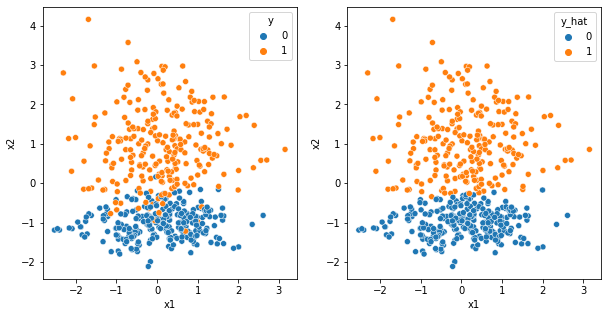

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

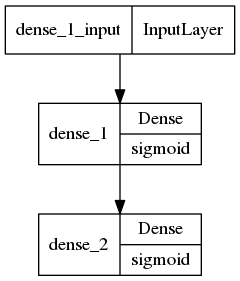

In [7]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

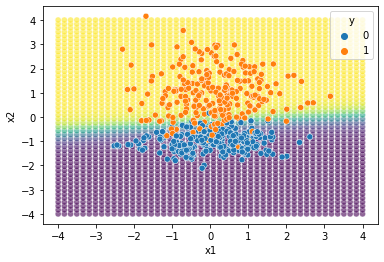

In [8]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### 3 sigmoid layers

<AxesSubplot:xlabel='x1', ylabel='x2'>

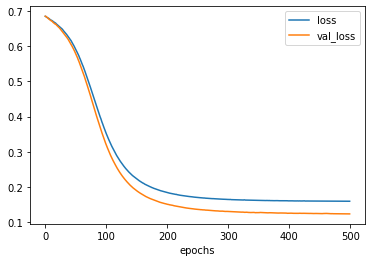

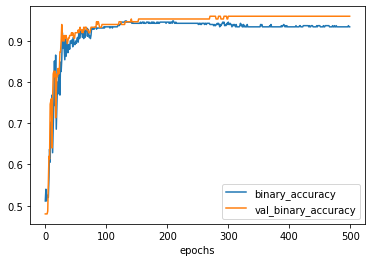

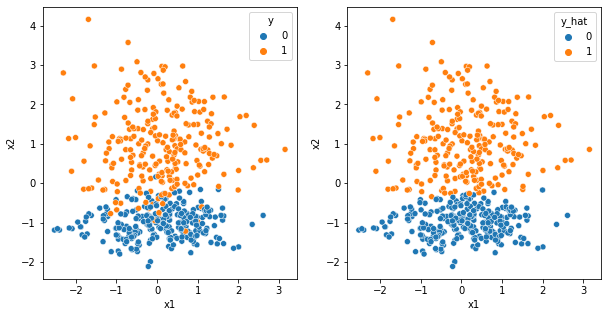

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

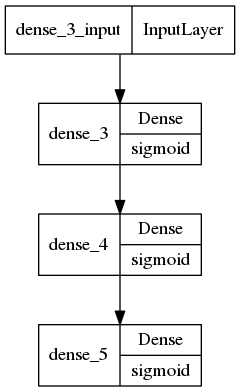

In [10]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

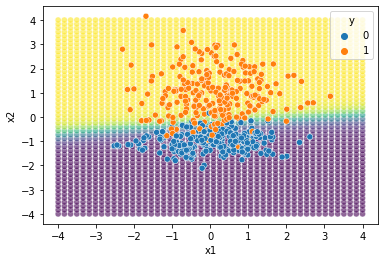

In [11]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### Something with Softmax

for using softmax i'll have to one hot encode the target.. so in the final layers we can have two outputs

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=500,
    batch_size=300,
    verbose=0,
    validation_split = 0.3
)

<AxesSubplot:xlabel='epochs'>

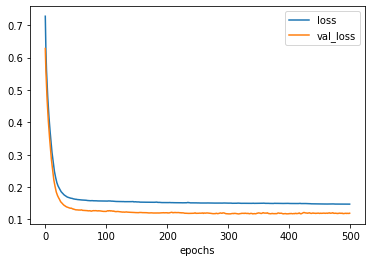

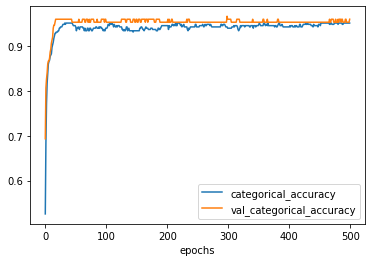

In [15]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

In [16]:
y_hat = model.predict(df[['x1','x2']].values)

df[['y_hat_0', 'y_hat_1']] = pd.DataFrame(y_hat)

df['y_hat'] = np.array(df['y_hat_0'] < df['y_hat_1'], dtype='int')

<AxesSubplot:xlabel='x1', ylabel='x2'>

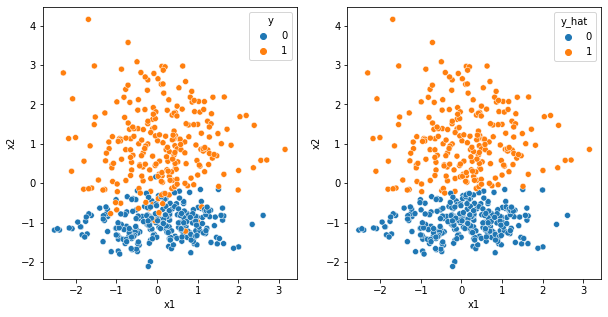

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

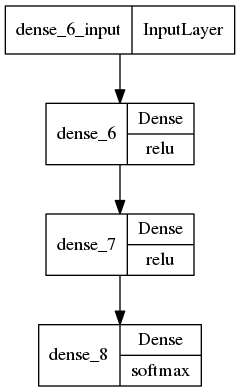

In [18]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

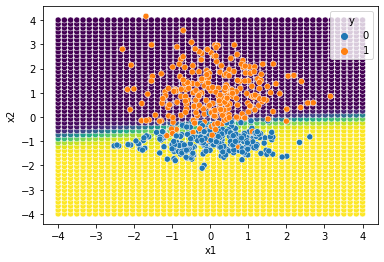

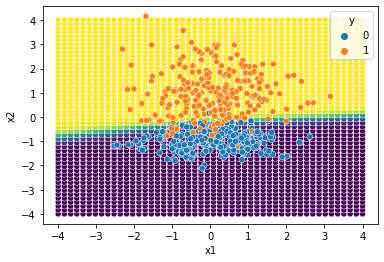

In [19]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)
areas = model.predict(all_ins)

for i in areas.T:
    sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=i,\
                    palette='viridis',legend=False)
    sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')
    plt.show()

## Spiral Classification

In [20]:
np.random.randn()

0.3018418790889105

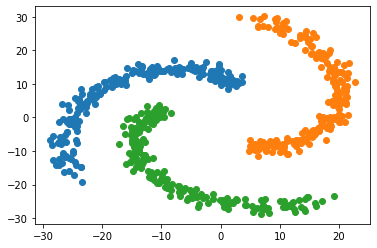

In [21]:
theta = (3 * np.pi) / 4

# rotation matrix
rotation_matrix = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

x1 = np.array([
    [
        (np.cos(i/8) * i) + np.random.randn(),(np.sin(i/8) * i) + np.random.randn()
    ] for i in np.linspace(10,30,200)
])
x2 = x1 @ rotation_matrix
x3 = x2 @ rotation_matrix

plt.scatter(x1[...,0], x1[...,1])
plt.scatter(x2[...,0], x2[...,1])
plt.scatter(x3[...,0], x3[...,1])

In [22]:
df1 = pd.DataFrame(x1, columns=['x1','x2'])
df1['y'] = 0

df2 = pd.DataFrame(x2, columns=['x1','x2'])
df2['y'] = 1

df3 = pd.DataFrame(x3, columns=['x1','x2'])
df3['y'] = 2

df = pd.concat([df1,df2,df3])

In [23]:
df.shape

(600, 3)

In [24]:
df = df.sample(frac=1)

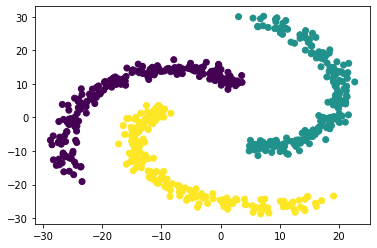

In [25]:
plt.scatter(data=df, x='x1',y='x2',c='y')

In [26]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()

### 2 sigmoids

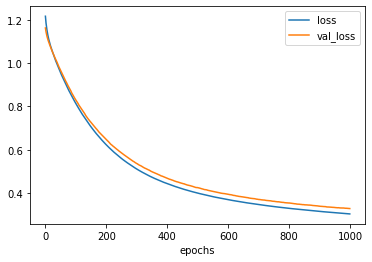

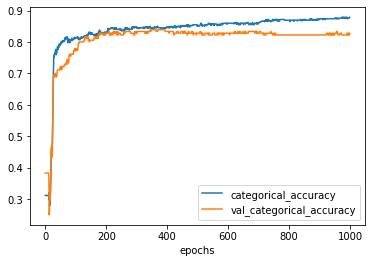

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=1000,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)

df[['y_hat_0', 'y_hat_1', 'y_hat_2']] = pd.DataFrame(y_hat)

df['y_hat'] = df[['y_hat_0', 'y_hat_1', 'y_hat_2']].idxmax(axis=1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

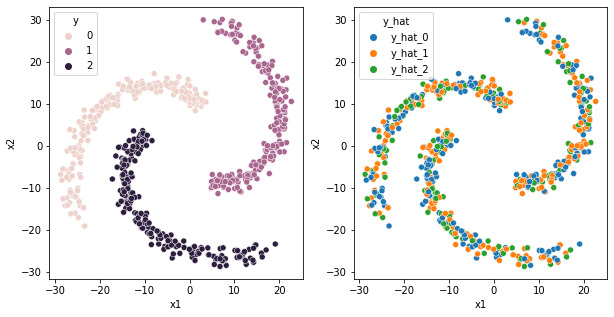

In [28]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

In [29]:
a1 = np.linspace(-100,100,100)
a2 = np.linspace(-100,100,100)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)
areas = model.predict(all_ins)

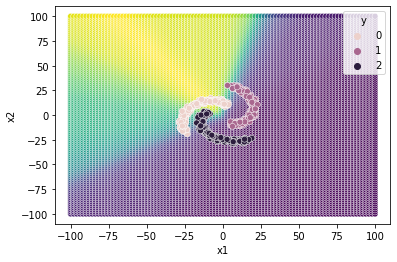

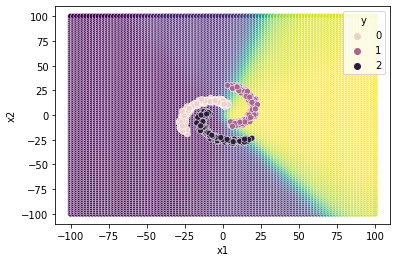

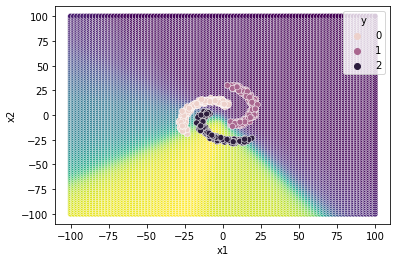

In [30]:
for i in areas.T:
    sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=i,\
                    palette='viridis',legend=False)
    sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')
    plt.show()

### A little bit complex model

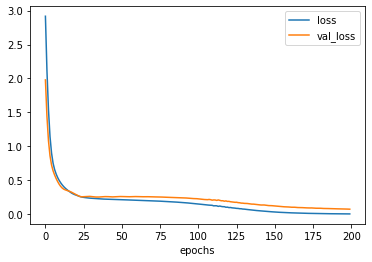

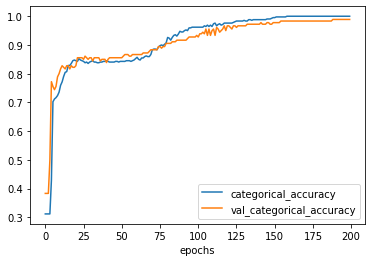

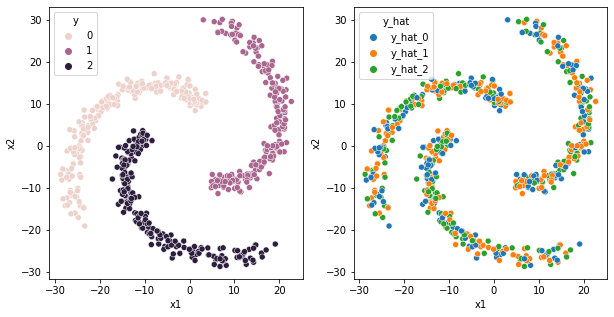

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    y_ohe,
    epochs=200,
    batch_size=500,
    verbose=0,
    validation_split = 0.3
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['categorical_accuracy','val_categorical_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)

df[['y_hat_0', 'y_hat_1', 'y_hat_2']] = pd.DataFrame(y_hat)

df['y_hat'] = df[['y_hat_0', 'y_hat_1', 'y_hat_2']].idxmax(axis=1)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])
plt.show()

In [34]:
a1 = np.linspace(-50,50,100)
a2 = np.linspace(-50,50,100)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)
areas = model.predict(all_ins)

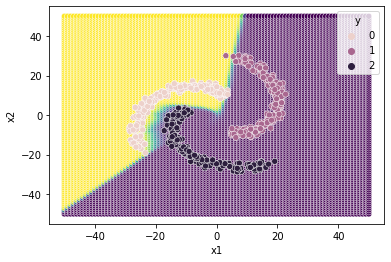

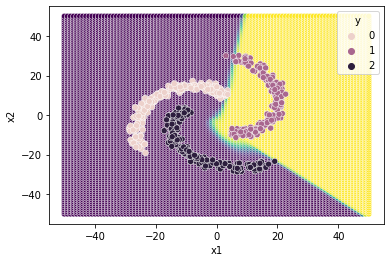

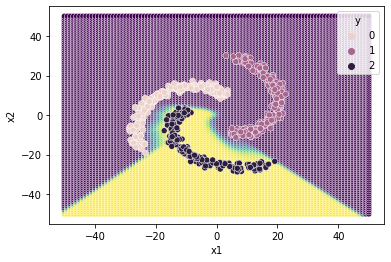

In [35]:
for i in areas.T:
    sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=i,\
                    palette='viridis',legend=False)
    sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')
    plt.show()